In [699]:
from math import sin, cos, sqrt
import numpy as np
np.set_printoptions(precision=4)

In [806]:
#x = w (width of strip), y = tm (parameter of mobius strip), z = tl (parameter of line)

def mob_point(x,y,R, spins=1):
    xcy2 = x*cos(spins*y/2)
    return (((R + xcy2)*cos(y)), ((R + xcy2)*sin(y)), x*sin(spins*y/2))

def mob_line_dist(x,y,z, R, r0, v): #distance between line and mobius strip evaluated at parameters tm, w, and tl
    xcy2 = x*cos(y/2)
    dx = ((R + xcy2)*cos(y)) - (r0[0] + v[0]*z)
    dy = ((R + xcy2)*sin(y)) - (r0[1] + v[1]*z)
    dz = x*sin(y/2)           - (r0[2] + v[2]*z)
    return sqrt(dx*dx + dy*dy + dz*dz)

def grad_mob_line_dist(x, y, z, R, r0, v): #gradient of the above function to be calculated later 
    a,b,c = v[0], v[1], v[2]
    
    cy = cos(y)
    cy2 = cos(y/2)
    sy = sin(y)
    sy2 = sin(y/2)

    xcy2 = x*cy2
    xsy = x*sy2*0.5
    xcycy2 = xcy2 * cy
    xsycy2 = xcy2 * sy
    
    dz = a*z
    ez = b*z
    fz = c*z
    rcy = R*cy
    rsy = R*sy
    
    adz = (rcy + xcycy2 - dz - r0[0])
    bez = (rsy + xsycy2 - ez - r0[1])
    cfz = (xsy*2 - fz - r0[2])
    
    #divide all by dist(x,y,z) for actial gradient
    
    grad_x = cy*cy2*adz + sy*cy2*bez + sy2*cfz
    grad_y = (-rsy - xsy*cy - xsycy2)*adz + (rcy - xsy*sy + xcycy2)*bez + (0.5*xcy2)*cfz
    grad_z = -(a*adz + b*bez + c*cfz)

    return np.asarray([grad_x, grad_y, grad_z], dtype=np.float64)

In [820]:
def gradient_descent(R, W, r0, v, deg):
    init = np.asarray([0,deg,0], dtype=np.float64)
    dist = 1.0
    old_dist = 0.0
    tol = 1e-15
#     print(init)
    count = 0
#     while not abs(old_dist - dist) < tol:
    for i in range(30):
        old_dist = dist
        
        grad = grad_mob_line_dist(init[0], init[1], init[2], R, r0, v)
        dist = mob_line_dist(init[0], init[1], init[2], R, r0, v)
        print init, grad, dist
        init -= (grad/dist)
        
        init[1] = init[1]%(2*np.pi)
        
        if init[0] < -W:
            init[0] = -W
        if init[0] > W:
            init[0] = W
        if init[2] < 0:
            init[2] = 0
        count += 1
        
        
    return dist

In [821]:
segments = 12
for i in range(segments+1):
    print mob_point(-0.1, (2*np.pi/segments)*i, 10, spins=3)

(9.9, 0.0, -0.0)
(8.599016794274808, 4.964644660940672, -0.07071067811865475)
(5.000000000000001, 8.660254037844386, -0.1)
(6.16653179854854e-16, 10.070710678118655, -0.07071067811865477)
(-5.049999999999997, 8.746856578222832, -1.2246467991473533e-17)
(-8.721491281413964, 5.035355339059331, 0.07071067811865471)
(-10.0, 1.2246467991473533e-15, 0.1)
(-8.599016794274808, -4.964644660940671, 0.07071067811865477)
(-4.950000000000005, -8.57365149746594, 2.4492935982947065e-17)
(-1.8239808578774975e-15, -9.929289321881345, -0.07071067811865474)
(4.999999999999993, -8.66025403784439, -0.1)
(8.721491281413963, -5.035355339059332, -0.07071067811865483)
(10.1, -2.4737865342776532e-15, -3.6739403974420595e-17)


In [823]:
radius = 10
width = 1
r0 = (-10,0,1)
v = (0,0,-1)
gradient_descent(radius, width, r0, v, np.pi)

[ 0.      3.1416  0.    ] [ -1.0000e+00  -1.2246e-14  -1.0000e+00] 1.0
[ 1.      3.1416  1.    ] [  1.0000e+00   1.2308e-12   1.0000e+00] 1.0
[ 0.      3.1416  0.    ] [ -1.0000e+00  -1.2183e-10  -1.0000e+00] 1.0
[ 1.      3.1416  1.    ] [  1.0000e+00   1.2061e-08   1.0000e+00] 1.0
[ 0.      3.1416  0.    ] [ -1.0000e+00  -1.1940e-06  -1.0000e+00] 1.0
[ 1.      3.1416  1.    ] [  1.0000e+00   1.1821e-04   1.0000e+00] 1.00000000007
[  6.9858e-11   3.1415e+00   7.0033e-11] [-1.     -0.0117 -1.    ] 1.00000068461
[ 1.      3.1532  1.    ] [ 1.      1.1575  1.    ] 1.0066835592
[ 0.0066  2.0033  0.0067] [  2.2999 -90.8407  -0.9877] 10.8249930916
[-0.2058  4.1119  0.0979] [ -3.0323  83.6511  -1.0842] 9.43462517355
[ 0.1156  1.5287  0.2128] [   7.0929 -101.1946   -0.7072] 14.5142224733
[-0.3731  2.2176  0.2615] [  0.737  -77.7485  -1.0725] 8.90653060124
[-0.4558  4.6638  0.382 ] [  -7.4657  104.4955   -0.9481] 14.0452489126
[ 0.0757  3.5071  0.4495] [ -0.5857  35.6706  -0.4761] 3.6631767762

20.30844500343246

In [824]:
mob_line_dist(1, np.pi/2, 1, 10, (0,10.5,1), (0,0,-1))

0.7368128791039503

In [825]:
from PIL import Image
from IPython.display import display, clear_output

In [826]:
im_size = 25 #units 
ppu = 4 #pixels per unit
size = im_size*ppu
im_arr = np.zeros((size, size, 3), dtype = np.uint8)

radius = 10 #radius of the mobius strip
width = 1  #width of the mobius strip

for i in range(size):
    print i
    for j in range(size):
        x = i/ppu + 1/(2*ppu) - im_size/2
        y = j/ppu + 1/(2*ppu) - im_size/2
        z = 4
        v = np.asarray([0,0,-1], dtype=np.float64)
        r0 = np.asarray([x,y,z], dtype=np.float64)
        
#         print(r0)
        gd = gradient_descent(radius, width, r0, v)
#         print(gd)
        if gd == 0.0:
            im_arr[i][j] = np.asarray([255,255,255], dtype=np.uint8)

vf = Image.fromarray(im_arr)
display(vf)

0


TypeError: gradient_descent() takes exactly 5 arguments (4 given)

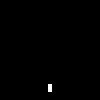

In [647]:
display(vf)